# Reinforcement Learning 
## MLU Session 7 - Berlin 
### Lecture 1

Cyrus Vahid @ Deep Engine

email: cyrusmv@amazon.com

# Navigating in a grid
- If you click a button the red square will start moving. Click the same button many times, and it will move faster and faster.
- Everytime you are moving horizontally you get a wind throwing you upwards.
- Everytime you are moving vertically you get a wind throwing you to the left.
- Whenever the countdown reaches 0, you loose.
- Hitting the outside walls or red obstacles would cause you to loose
- You win when you reach the green cell and will be rewarded 1000 bonous points

In [13]:
from IPython.display import IFrame
IFrame("../src/gridworld-game-with-goal.html", height=620, width=555)

# RL Elements

- Agent: Learner or decision maker
- Environment: What the agent interacts with. The environment could be known, unknown, or complex.
- Policy: A set of actions from which an agent can choose. In our example: Left-Right-Up-Down
- Action: Decisions an agent makes based on a policy in response to the environment. 
- State: The information that is used to determine what happens next.
- Reward: A scalar feedback that after each action the environment returns. An agent's job is to maximize the cumulative reward.

![](../images/agent-env.png)

# Reward Hypothesis








- ***All*** That all of what we mean by goals and purposes can be well thought of as maximization of the expected value of the cumulative sum of a received scalar signal (reward).
for further information and discuttion check this [link](http://incompleteideas.net/rlai.cs.ualberta.ca/RLAI/rewardhypothesis.html).

- We will come back to this later as the reductionist argument could have unseen consequences



# Markov Property
- The future can be predicted independently from the past and only baed on present.
 - Example: Autonomous helicopter: 

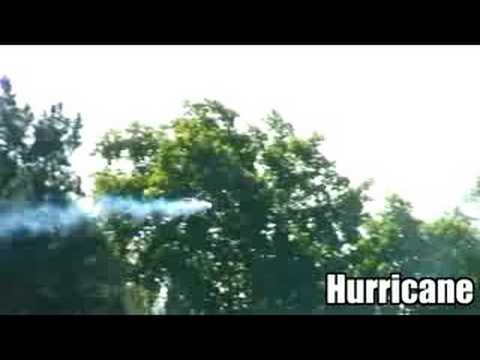

In [11]:
from IPython.display import YouTubeVideo
from datetime import timedelta
YouTubeVideo('VCdxqn0fcnE', width=560*1.5, height=316*1.5)

- Velocity, location, and direction of the helicopter at time t is what we need to determine where the helicopter will be in time t+1
- The environment affects the helicopter after each action based on wind speed.

# Markov Property
$ \boldsymbol{\large Definition:}$

$
\large State\ S_t\ is\ Markov\ if\ and\ only\ if: 
$
$$\large 
\boxed{𝑃(𝑆_{𝑡+1}|𝑆_𝑡)=𝑃(𝑆_{𝑡+1}|𝑆_1, …, 𝑆_𝑡)}\ \small without\ action
$$
$$or$$
$$\large
\boxed{𝑃(𝑆_{𝑡+1}|𝑆_𝑡, a_t)=𝑃(𝑆_{𝑡+1}|𝑆_1, …, 𝑆_𝑡, a_t)}\ \small with\ action
$$

$$
Or\ more\ intuitively:
$$
$$\large 
\boldsymbol{Future\ is\ independent\ of\ past\ given\ present.}
$$



# Random Walk

In [1]:
import sys
sys.path.append('../src/examples/')
from random_walk import *
import tkinter as tk
rw = RandomWalk()
vr = VisualizeRandomWalk(rw=rw)
vr.run()

# Markov Chain - *intuition*
- A stochastic model, describing a sequence of possible events where probability of each event only depends on the previous state.
- Simply put: A sequence of randome states with Markov Property
- A finite Markov chain is the process $ X_0, X_1, X_2, ... X_n$

$\large Definition:$
- The state of the Markov chain at time t is the value of $X_t$

## Example
<img src="../images/markov_state.png" alt="Drawing" style="width: 900px;"/>

$\large Definition:$
- The state space $S$, is the set of values each $X_t$ can take. 

## Example
$$\large S=\{0, 1, 2, 3, 4, 5, 6 , 7, 8, 9\}$$


# State Transition Matrix
- For a Markov state $s$ and succesor state $ s' $, the state transitoin probability is defines by 
$$
\mathcal P_{ss'} = \mathbb P[S+{t+1}=s'|S_t=s]\\
$$
State transition matrix $\mathcal P$ defines transition probabilities from all states $s$ to all succesor $s'$.

$$
\begin{equation*}
    \mathcal P= 
    \begin{bmatrix}
        P_{11}=P(s_1|s_1) & P_{12}=P(s_2|s_1) & ... & P_{1n}=P(s_N|s_1)\\
        P_{21}=P(s_1|s_1) & P_{22}=P(s_2|s_1) & ... & P_{2n}=P(s_N|s_1)\\
        ...\\
        P_{n1}=P(s_1|s_N) & P_{n2}=P(s_2|s_N) & ... & P_{nn}=P(s_N|s_N)\\
    \end{bmatrix}
\end{equation*}
$$

## Example

In [3]:
for i in range(len(rw.transition_matrix)):
    print(*rw.transition_matrix[i])


0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.5 0.0 0.5 0.0 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.5 0.0 0.5 0.0 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.5 0.0 0.5 0.0 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.5 0.0 0.5 0.0 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.5 0.0 0.5 0.0 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.5 0.0 0.5 0.0 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.5 0.0 0.5 0.0
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.5 0.0 0.5
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0


## Example
$
\begin{equation*}
    \mathcal P=
        \begin{matrix}
            \\0\\1\\2\\3\\4\\5\\6\\7\\8\\9
        \end{matrix}
     \begin{bmatrix}
          0&1&2&3&4&5&6&7&8&9\\
        \color{red}{0.0} & \color{green}{1.0} & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
        \color{green}{0.5} & \color{red}{0.0} &\color{green}{0.5} & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
        0.0 & \color{green}{0.5} & \color{red}{0.0} &\color{green}{0.5} & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
        0.0 & 0.0 & \color{green}{0.5} & \color{red}{0.0} &\color{green}{0.5} & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
        0.0 & 0.0 & 0.0 & \color{green}{0.5} & \color{red}{0.0} &\color{green}{0.5} & 0.0 & 0.0 & 0.0 & 0.0 \\
        0.0 & 0.0 & 0.0 & 0.0 & \color{green}{0.5} & \color{red}{0.0} &\color{green}{0.5} & 0.0 & 0.0 & 0.0 \\
        0.0 & 0.0 & 0.0 & 0.0 & 0.0 & \color{green}{0.5} & \color{red}{0.0} &\color{green}{0.5} & 0.0 & 0.0 \\
        0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & \color{green}{0.5} & \color{red}{0.0} &\color{green}{0.5} & 0.0 \\
        0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & \color{green}{0.5} & \color{red}{0.0} &\color{green}{0.5} \\
        0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
      \end{bmatrix}
\end{equation*}\\
\large{\mathcal P_{0=>1}=100\%;\\ P_{5=>6}=50\%;\ \mathcal P_{1=>6}=0\%}
$

# In-class assignment
Improve the policy so we reach the position 9 faster no matter whered we start

# Markov Chain - *formalized*
$\large{
Definition:
}\\
$

A Markov Process (or Markov Chain) is a tuple $\langle \mathcal S, \mathcal P \rangle$
- $\mathcal S$ is a (finite) state space
- $\mathcal P$ is the state transition probability matrix,
$
\mathcal P_{ss'} = \mathbb P[S+{t+1}=s'|S_t=s]\\
$



$\large Definition:$
- a trajectory of a Markov  chain is a particular set of states  for $X_0, X_1, ...X_\tau$.
- A trajectory $T$ at timestep $\tau$ is referred to as $\{s_0, s_1, s_2,..., s_\tau\}$

## Example
![](../images/episodes1.png)

$
\begin{equation*}
    \mathcal P=
        \begin{matrix}
            \\A\\B\\C\\D\\E\\F\\G\\T
        \end{matrix}
     \begin{bmatrix}
         A&B&C&D&E&F&G&T\\
         & 0.5 &  &  &  &  &  & 0.5 \\
        0.1 & 0.5 & 0.4 &  &  &  &  &  \\
         &  &  & 0.4 &  &  & 0.3 & 0.4 \\
         &  &  & & 0.8 & 0.1 & 0.1 & \\
         &  &  &  &  & 1 &  &  \\
         &  &  &  &  &  & 1.0 &  \\
         &  &  &  &  &  & 0.9 & 0.1 \\
         &  &  &  &  &  &  &  \\
      \end{bmatrix}
\end{equation*}
$

In [5]:
t1, a1 = rw.move()
t2, a2 = rw.move()
print("trajectory1: {}\n".format(list(zip(t1, a1))))
print("trajectory2: {}\n".format(list(zip(t2, a2))))
print("t1 @ t=5: {}".format(list(zip(t1[0:4], a1[0:4]))))

trajectory1: [(3, '<-'), (2, '<-'), (1, '<-'), (0, '->'), (1, '<-'), (0, '->'), (1, '<-'), (0, '->'), (1, '<-'), (0, '->'), (1, '<-'), (2, '<-'), (3, '<-'), (4, '<-'), (3, '<-'), (2, '<-'), (3, '<-'), (4, '<-'), (5, '->'), (6, '->'), (7, '->'), (8, '->'), (9, '-')]

trajectory2: [(3, '<-'), (2, '<-'), (1, '->'), (2, '<-'), (3, '<-'), (4, '->'), (5, '<-'), (4, '->'), (5, '<-'), (6, '->'), (7, '->'), (8, '->'), (9, '-')]

t1 @ t=5: [(3, '<-'), (2, '<-'), (1, '<-'), (0, '->')]


$\large Definition:$
- a trajectory of a Markov  chain is a particular set of states  for $X_0, X_1, ...X_\tau$.
- A trajectory $T$ at timestep $\tau$ is referred to as $\{s_0, a_0, s_1, a_1, s_2,, a_2 ..., s_\tau, a_\tau\}$

# More Formally
$\large Definition:$
A *trajectory* is a sequence of states and actions obtained by the following procedure:
$$\boxed{
1.\ The\ initial\ state\ s_1\ is\ chosen\ following\ the\ initial\ probability\ p(s).\\
2. For t = 1,...,\tau ,\\
\ \ \ \ (a)\ The\ action\ at\ is\ chosen\ following\ the\ policy\ \pi(a_t|s_t).\\
\ \ \ \ (b)\ The\ next\ state\ s_{t+1}\ is\ determined\ according\ to\ the\ transition\ probability\ p(s_{t+1}|s_t, a_t).
}$$

\begin{equation*}
    \mathcal P_s\mathcal P_{s'}= 
    \begin{bmatrix}
        P(s_1|s_1) & P(s_2|s_1) & ... & P(s_N|s_1)\\
        P(s_1|s_1) & P(s_2|s_1) & ... & P(s_N|s_1)\\
        ...\\
        P(s_1|s_N) & P(s_2|s_N) & ... & P(s_N|s_N)\\
    \end{bmatrix}
\end{equation*}

$
\usepackage{kbordermatrix}
$